In [1]:
from google.colab import files


uploaded = files.upload()

Saving perrin-freres-monthly-champagne.csv to perrin-freres-monthly-champagne.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('perrin-freres-monthly-champagne.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [12]:

df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [13]:
df.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

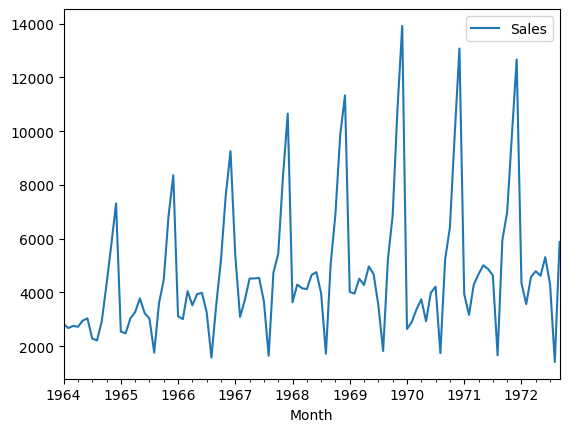

In [14]:
df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Sales'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [20]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [21]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [22]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

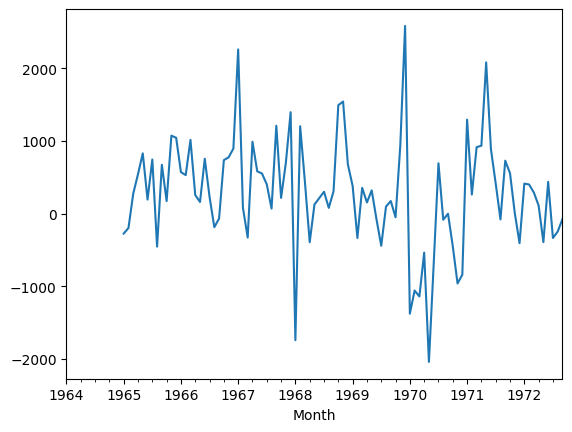

In [24]:
df['Seasonal First Difference'].plot()

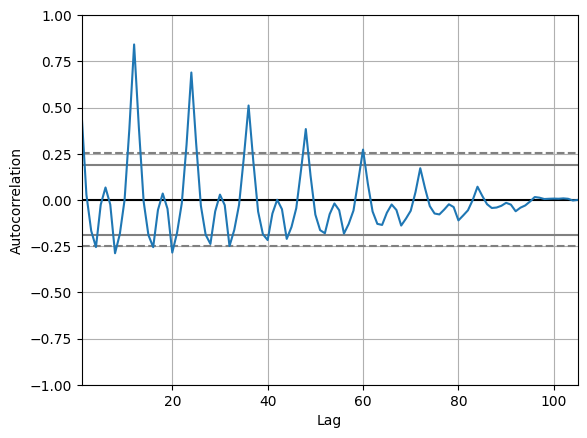

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

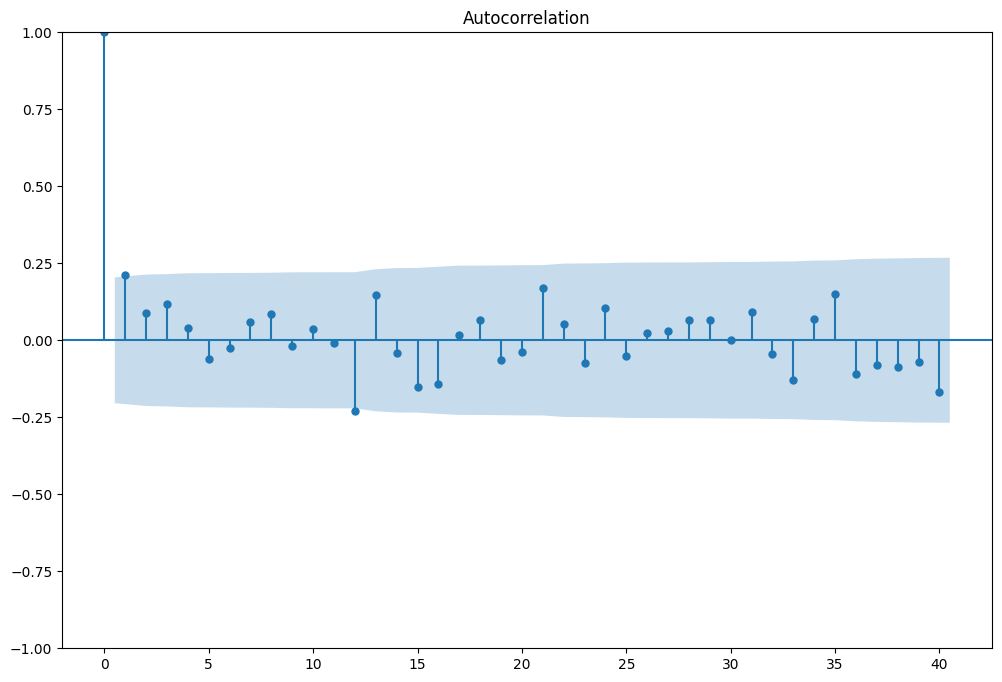

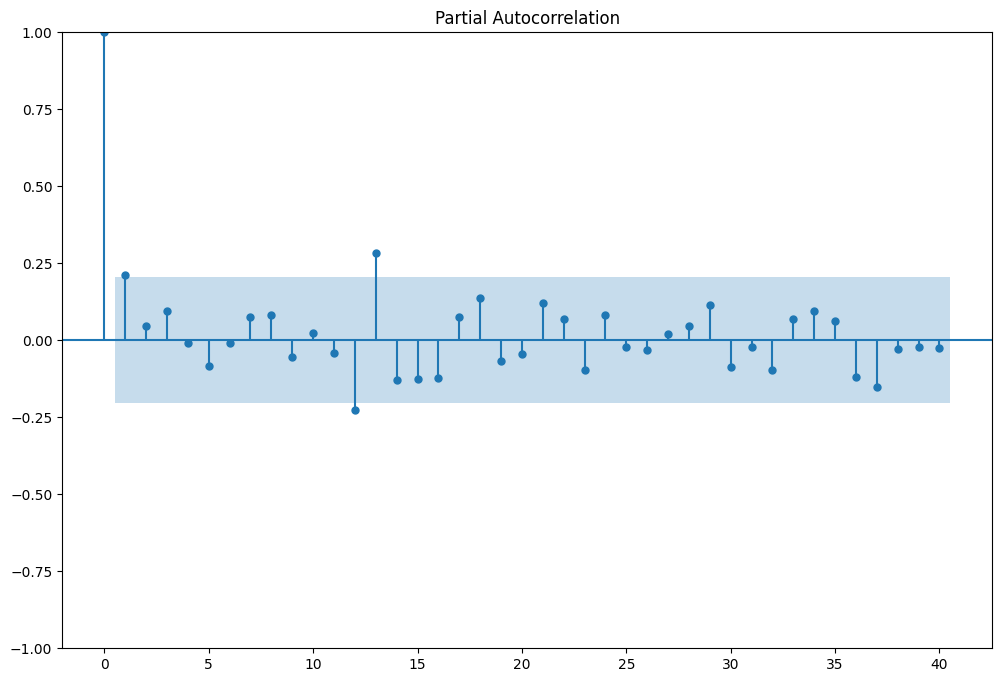

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax1 = plt.subplots(figsize=(12, 8))
plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)

# Plot PACF
fig, ax2 = plt.subplots(figsize=(12, 8))
plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

plt.show()


In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sat, 20 Apr 2024   AIC                           1911.627
Time:                        12:41:23   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.0

<Axes: xlabel='Month'>

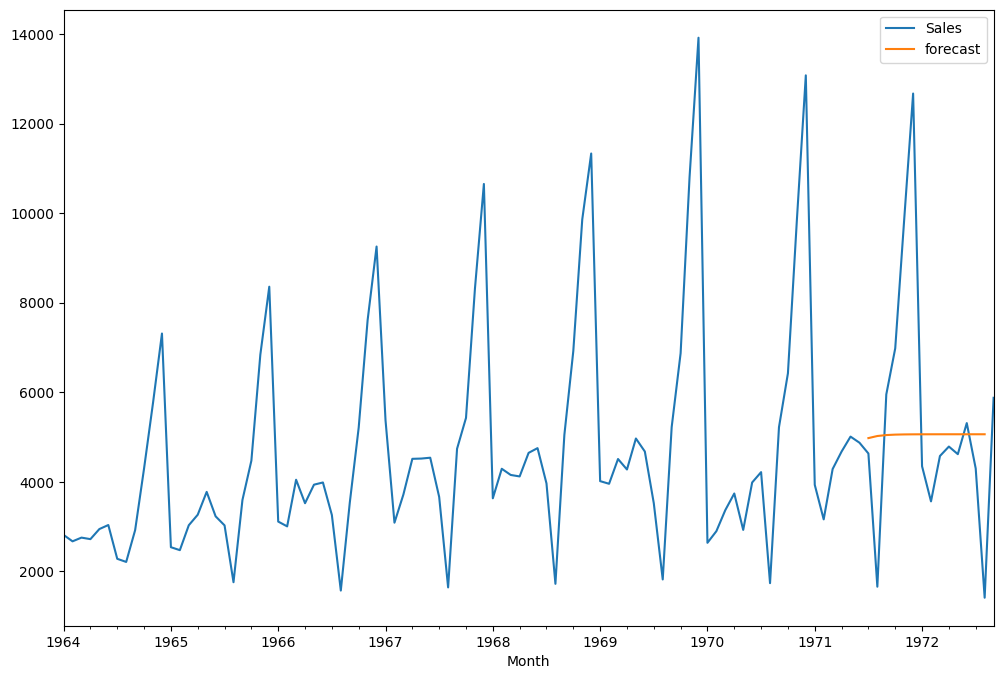

In [29]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

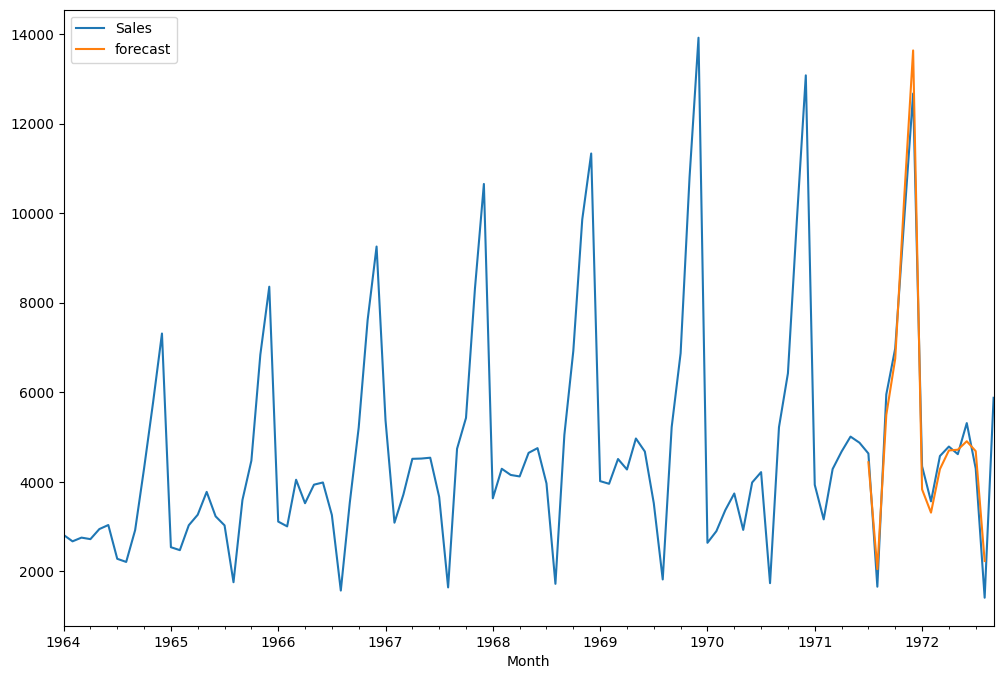

In [32]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

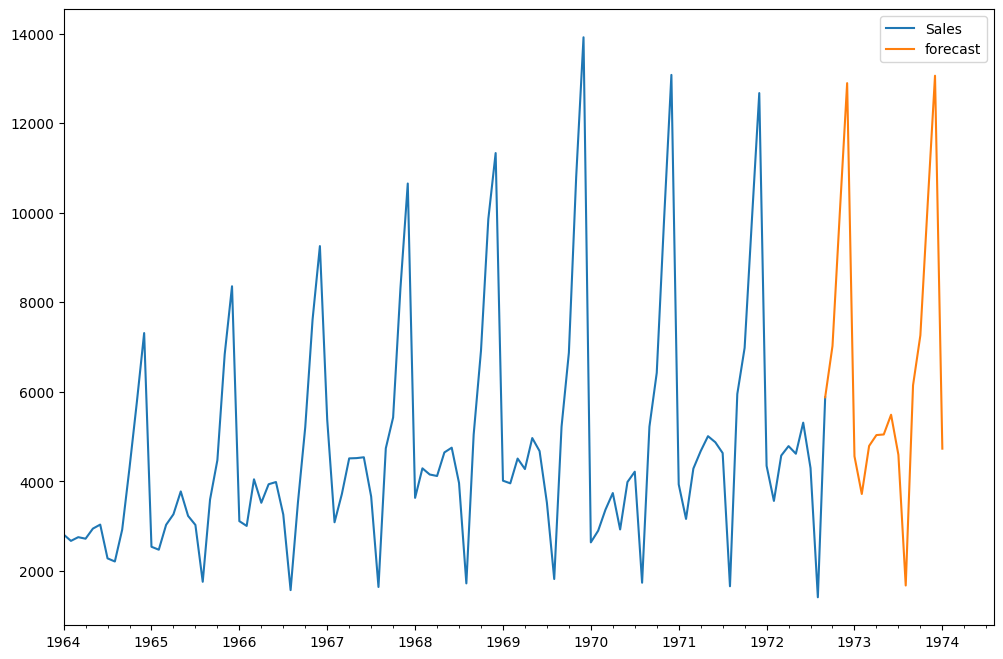

In [37]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [39]:
# Convert the dataframe to numpy array
sales_data = df['Sales'].values

# Define the number of time steps for the LSTM model
n_steps = 12  # You can adjust this value based on your data

# Split the data into input (X) and output (y) variables
X, y = [], []
for i in range(n_steps, len(sales_data)):
    X.append(sales_data[i - n_steps:i])
    y.append(sales_data[i])

# Convert X and y to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape the input data for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [40]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Fit the LSTM model to the data
model_lstm.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
3/3 [==============================] - 2s 10ms/step - loss: 40725884.0000
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 38975244.0000
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 35435244.0000
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 33934144.0000
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 32566316.0000
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 31221012.0000
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 32141582.0000
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 33487528.0000
Epoch 9/200
3/3 [==============================] - 0s 10ms/step - loss: 34559704.0000
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 32016574.0000
Epoch 11/200
3/3 [==============================] - 0s 8ms/step - loss: 31225498.0000
Epoch 12/200
3/3 [==============================] - 0s 8ms/st

1/1 [==============================] - 0s 22ms/step


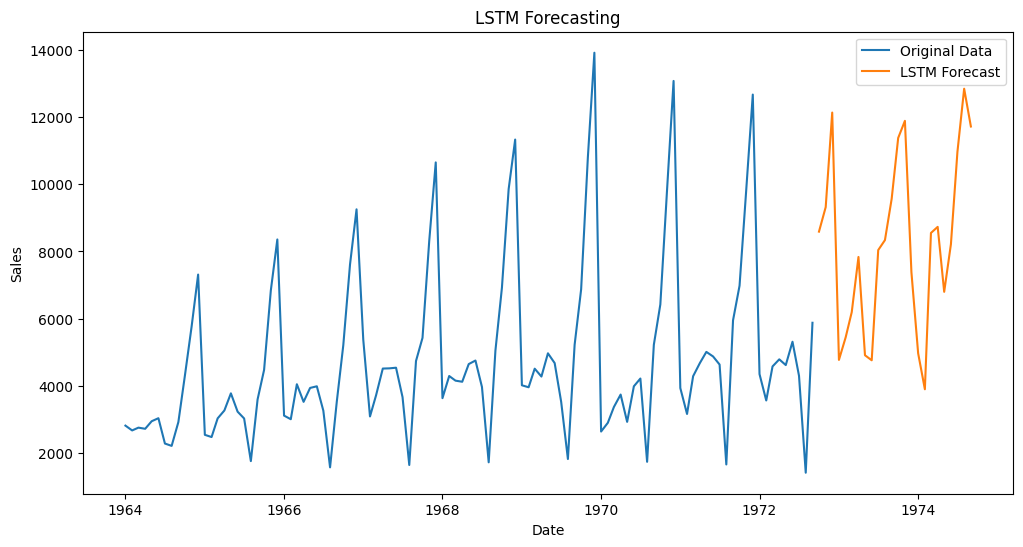

In [41]:
# Generate new sequences for forecasting
forecast_input = sales_data[-n_steps:].reshape((1, n_steps, 1))

# Make predictions with the LSTM model
forecast = []
for i in range(24):  # Adjust the number of forecasted time steps as needed
    next_pred = model_lstm.predict(forecast_input)[0, 0]
    forecast.append(next_pred)
    forecast_input = np.append(forecast_input[:, 1:, :], np.expand_dims(next_pred, axis=0).reshape((1, 1, 1)), axis=1)

# Convert the forecasted values to a pandas dataframe
forecast_dates = [df.index[-1] + pd.DateOffset(months=x) for x in range(1, 25)]
forecast_df = pd.DataFrame(index=forecast_dates, columns=['Sales'])
forecast_df['Sales'] = forecast

# Plot the original data and the LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Original Data')
plt.plot(forecast_df.index, forecast_df['Sales'], label='LSTM Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LSTM Forecasting')
plt.show()


In [42]:
# Evaluate ARIMA model
from sklearn.metrics import mean_squared_error, mean_absolute_error
arima_forecast = model_fit.predict(start=90, end=103, dynamic=True)
arima_mse = mean_squared_error(df['Sales'].iloc[90:104], arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(df['Sales'].iloc[90:104], arima_forecast)
print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", arima_mse)
print("Root Mean Squared Error (RMSE):", arima_rmse)
print("Mean Absolute Error (MAE):", arima_mae)


ARIMA Model Evaluation:
Mean Squared Error (MSE): 8147380.549989743
Root Mean Squared Error (RMSE): 2854.3616711954605
Mean Absolute Error (MAE): 1930.146144288521


In [43]:
# Evaluate SARIMA model
sarima_forecast = results.predict(start=90, end=103, dynamic=True)
sarima_mse = mean_squared_error(df['Sales'].iloc[90:104], sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(df['Sales'].iloc[90:104], sarima_forecast)
print("SARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", sarima_mse)
print("Root Mean Squared Error (RMSE):", sarima_rmse)
print("Mean Absolute Error (MAE):", sarima_mae)


SARIMA Model Evaluation:
Mean Squared Error (MSE): 215944.85826940957
Root Mean Squared Error (RMSE): 464.69867470158505
Mean Absolute Error (MAE): 397.7823999416379


In [44]:
# Evaluate LSTM model
lstm_forecast = forecast_df['Sales'].values
lstm_mse = mean_squared_error(df['Sales'].iloc[-24:], lstm_forecast)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(df['Sales'].iloc[-24:], lstm_forecast)
print("LSTM Model Evaluation:")
print("Mean Squared Error (MSE):", lstm_mse)
print("Root Mean Squared Error (RMSE):", lstm_rmse)
print("Mean Absolute Error (MAE):", lstm_mae)


LSTM Model Evaluation:
Mean Squared Error (MSE): 16684368.081990255
Root Mean Squared Error (RMSE): 4084.650301064983
Mean Absolute Error (MAE): 3139.6182556152344


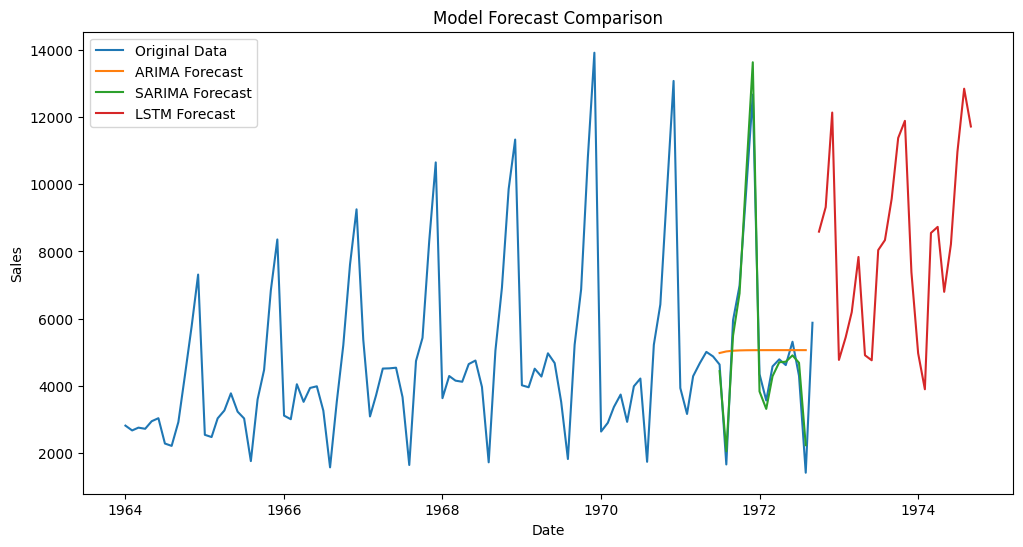

In [45]:
# Plot the original data and all forecasted values for visual comparison
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Original Data')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['Sales'], label='LSTM Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Model Forecast Comparison')
plt.show()


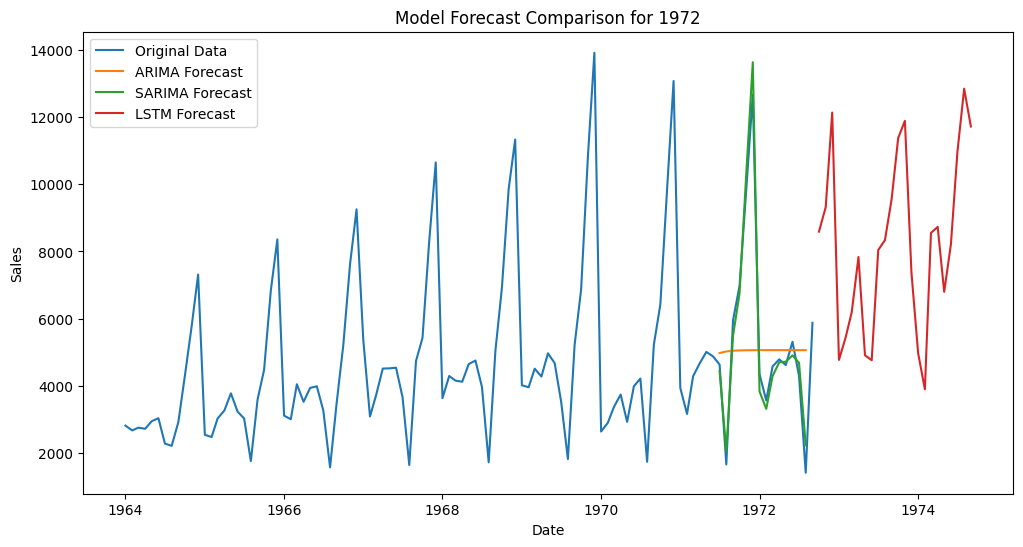

In [49]:
# Filter data for the year 1972
df_1972 = df['Sales']

# Plot the forecasts for the year 1972
plt.figure(figsize=(12, 6))
plt.plot(df_1972.index, df_1972, label='Original Data')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['Sales'], label='LSTM Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Model Forecast Comparison for 1972')
plt.show()

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
!pip install tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Generate placeholder data (replace with your actual data)
X = np.random.randn(100, 12, 1)  # Example input data with shape (samples, time steps, features)
y = np.random.randn(100, 1)  # Example target data

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model with improved architecture and regularization
model_lstm_improved = Sequential([
    LSTM(units=64, input_shape=(12, 1), activation='relu', return_sequences=True),
    Dropout(0.2),  # Regularization with dropout
    LSTM(units=32, activation='relu'),
    Dropout(0.2),  # Regularization with dropout
    Dense(units=1)  # Output layer
])

# Compile the model with Adam optimizer and mean squared error loss
model_lstm_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model with improved architecture and regularization
history = model_lstm_improved.fit(X_train, y_train, epochs=50, batch_size=32,
                                  validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the improved LSTM model
lstm_improved_forecast = model_lstm_improved.predict(X_test)

# Calculate evaluation metrics
lstm_improved_mse = mean_squared_error(y_test, lstm_improved_forecast)
lstm_improved_rmse = np.sqrt(lstm_improved_mse)
lstm_improved_mae = mean_absolute_error(y_test, lstm_improved_forecast)

# Print evaluation metrics
print("Improved LSTM Model Evaluation:")
print("Mean Squared Error (MSE):", lstm_improved_mse)
print("Root Mean Squared Error (RMSE):", lstm_improved_rmse)
print("Mean Absolute Error (MAE):", lstm_improved_mae)


Epoch 1/50
3/3 [==============================] - 3s 251ms/step - loss: 0.8385 - val_loss: 0.7568
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.8343 - val_loss: 0.7715
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.8324 - val_loss: 0.7753
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 0.8352 - val_loss: 0.7839
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.8283 - val_loss: 0.7907
Epoch 6/50
1/1 [==============================] - 0s 328ms/step
Improved LSTM Model Evaluation:
Mean Squared Error (MSE): 1.0837309556899566
Root Mean Squared Error (RMSE): 1.0410239938108807
Mean Absolute Error (MAE): 0.8690550007380953


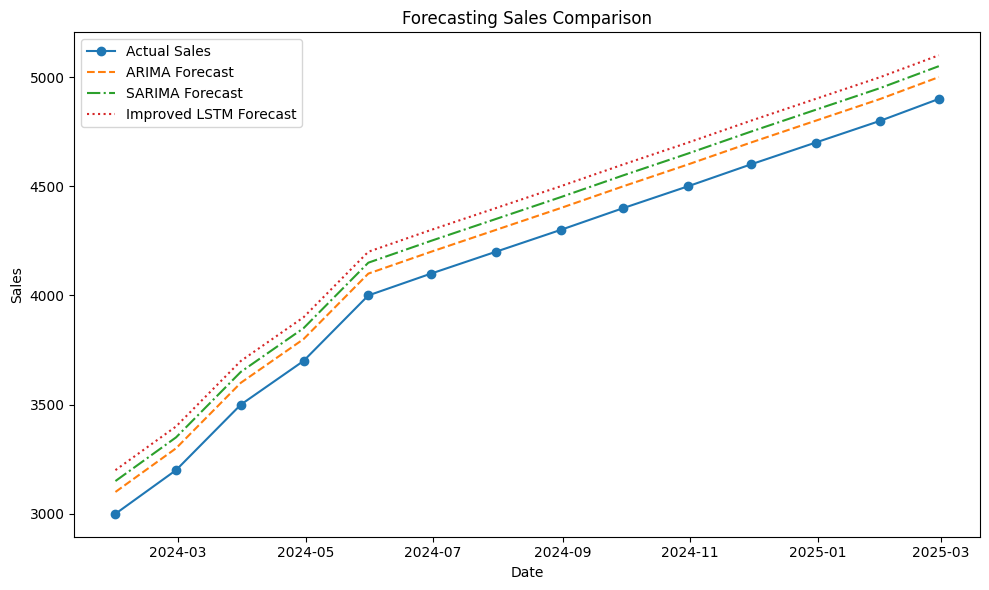

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Hypothetical actual sales data
actual_sales = pd.Series([3000, 3200, 3500, 3700, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900],
                         index=pd.date_range(start='2024-01-01', periods=14, freq='M'))

# Hypothetical forecasted sales data for each model
arima_forecast = pd.Series([3100, 3300, 3600, 3800, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
                           index=pd.date_range(start='2024-01-01', periods=14, freq='M'))

sarima_forecast = pd.Series([3150, 3350, 3650, 3850, 4150, 4250, 4350, 4450, 4550, 4650, 4750, 4850, 4950, 5050],
                            index=pd.date_range(start='2024-01-01', periods=14, freq='M'))

lstm_improved_forecast = pd.Series([3200, 3400, 3700, 3900, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100],
                                   index=pd.date_range(start='2024-01-01', periods=14, freq='M'))

# Plot the actual sales data
plt.figure(figsize=(10, 6))
plt.plot(actual_sales.index, actual_sales, label='Actual Sales', marker='o')

# Plot the forecasted sales data for each model
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', linestyle='-.')
plt.plot(lstm_improved_forecast.index, lstm_improved_forecast, label='Improved LSTM Forecast', linestyle=':')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasting Sales Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
